In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
from networkx.algorithms.tree.branchings import Edmonds
from collections import defaultdict
% matplotlib inline

In [2]:
labels = ["nsubj", "dobj", "iobj", "det", "nmod", "amod", "cc", "conj"]
sent = "This is a test sentence".split()
def matrix_to_graph(A, sent, labels, digraph=False):
    """
    Turns a numpy 
    """
    k = A.shape[0]
    nodes = range(k)
    if digraph:
        # This function turns a np matrix into a directed graph
        G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
        # Trying to get labels on the arcs... No succes yet
        labels = {(i, j, A[i,j]): np.random.choice(labels) for i,j in itertools.product(nodes, nodes)}
    else:
        G = nx.from_numpy_matrix(A)
        
    for k, w in enumerate(sent):
        G.node[k]['word'] = w
        
    weighted_edges = {(i, j): A[i,j] for i,j in itertools.product(nodes, nodes)}
    return G, weighted_edges

def minimum_tree(G):
    edmonds = Edmonds(G)
    tree = edmonds.find_optimum()
    return tree

[0, 1, 2, 3, 4]
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)]
G has 12 edges
[0, 1, 2, 3, 4]
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
digraph-G has 25 edges


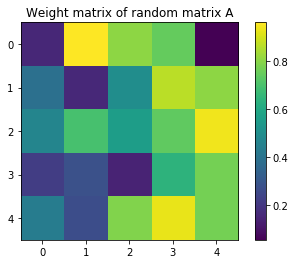

In [3]:
A = np.random.random((5,5))
diG, edges = matrix_to_graph(A, sent, labels, digraph=True)
G, _ = matrix_to_graph(A, sent, labels, digraph=False)

print(G.nodes)
print(G.edges)
print("G has {} edges".format(len(G.edges)))
print(diG.nodes)
print(diG.edges)
print("digraph-G has {} edges".format(len(diG.edges)))

plt.imshow(A)
plt.colorbar()
plt.title("Weight matrix of random matrix A")
plt.show()

# words = nx.get_node_attributes(G,'word')
# print(words)
# labels = nx.get_edge_attributes(G,'key')
# print(labels)

{(0, 0): '0.16', (0, 1): '0.96', (0, 2): '0.80', (0, 3): '0.75', (0, 4): '0.05', (1, 0): '0.39', (1, 1): '0.16', (1, 2): '0.50', (1, 3): '0.87', (1, 4): '0.81', (2, 0): '0.47', (2, 1): '0.70', (2, 2): '0.56', (2, 3): '0.74', (2, 4): '0.94', (3, 0): '0.22', (3, 1): '0.28', (3, 2): '0.15', (3, 3): '0.64', (3, 4): '0.77', (4, 0): '0.43', (4, 1): '0.27', (4, 2): '0.79', (4, 3): '0.93', (4, 4): '0.77'}


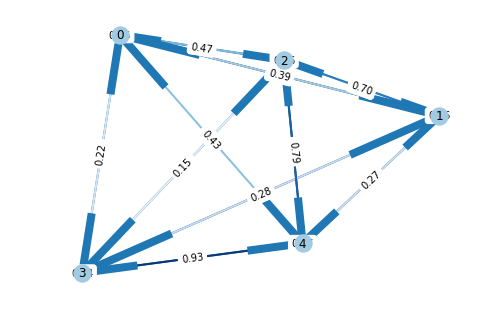

{(0, 0): '0.16', (0, 1): '0.39', (0, 2): '0.47', (0, 3): '0.22', (0, 4): '0.43', (1, 1): '0.16', (1, 2): '0.70', (1, 3): '0.28', (1, 4): '0.27', (2, 2): '0.56', (2, 3): '0.15', (2, 4): '0.79', (3, 3): '0.64', (3, 4): '0.93', (4, 4): '0.77'}


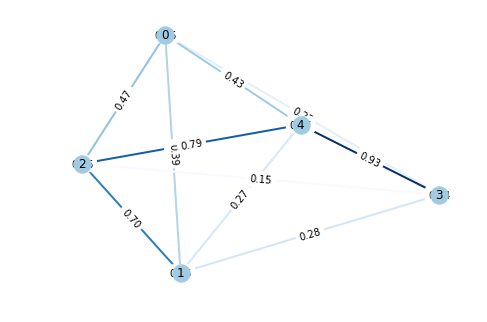

{(0, 1): '0.96', (0, 2): '0.80', (2, 4): '0.94', (4, 3): '0.93'}


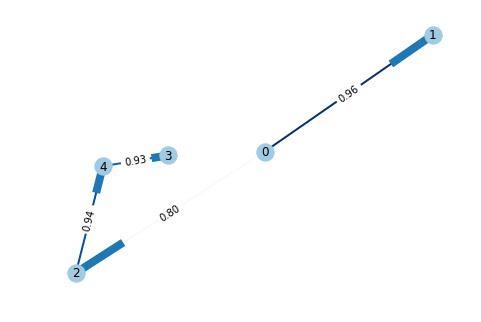

{(0, 1): '0.39', (1, 2): '0.70', (1, 3): '0.28', (3, 4): '0.93'}


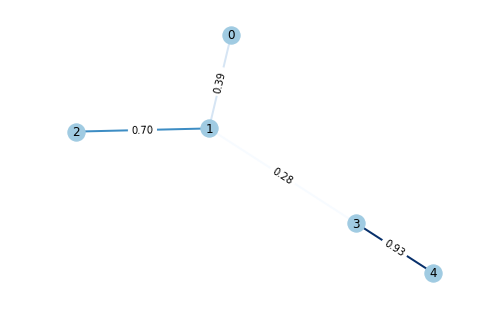

In [4]:
def draw_nice(G, custom_labels = False):
    colors = [G[i][j]['weight'] for (i,j) in G.edges()]

    node_labels = {}
    if custom_labels:
        for index in G.nodes:
            node_labels[index] = G.nodes[index]['word'];
    positions = nx.spring_layout( G )
    nx.draw(G, node_color='#A0CBE2', pos=positions, edge_color = colors,
            width=2, edge_cmap=plt.cm.Blues,with_labels=not custom_labels)
    if node_labels:
        nx.draw_networkx_labels(G,positions, node_labels)
        
    labels = nx.get_edge_attributes(G,'weight')
    for key in labels:
        labels[key] = "{0:.2f}".format(labels[key])
    print(labels)
    nx.draw_networkx_edge_labels(G,pos=positions,edge_labels=labels)
    plt.show()

# colors = [edges[(i,j)] for (i,j) in G.edges()]
# dicolors = [edges[(i,j)] for (i,j) in diG.edges()]

draw_nice(diG)
draw_nice(G)

tree = minimum_tree(diG)
# colors = [edges[(i,j)] for (i,j) in tree.edges()]
draw_nice(tree)

tree = minimum_tree(G)
# colors = [edges[(i,j)] for (i,j) in tree.edges()]
draw_nice(tree)

In [5]:
def get_score(T):
    score = 0
    for i, j in T.edges:
        score += T.get_edge_data(i,j)['weight']
    return score
    
def argmax(G,v):
    maxim = -np.inf
    max_edge = ()
    for i,j in G.edges():
        if j == v and G.get_edge_data(i,j)['weight'] > maxim:
            maxim = G.get_edge_data(i,j)['weight']
            max_edge = (i,j)
    return max_edge

def get_nodes(C):
    lista = []
    for i,j,_ in C:
        lista.append(i)
        lista.append(j)
    return list(set(lista))

def get_incoming_edge(node, C):
    for i,j,_ in C:
        if j == node:
            return (i,j)
    assert False
    

def prepare(G, root=0):
    # We first remove any edge from G.edges whose destination is r.
    # We may also replace any set of parallel edges with a single edge 
    # with weight equal to the maximum of the weights of these parallel edges.
    
    G_new = nx.DiGraph()
    dictionary = defaultdict(lambda: -np.inf)
    for edge in G.edges:
        if edge[1] != root and edge[0] != edge[1]:
            if dictionary[edge] < G.get_edge_data(edge[0], edge[1])['weight']:
                dictionary[edge] = G.get_edge_data(edge[0], edge[1])['weight']
    for key in dictionary.keys():
        G_new.add_edge(key[0], key[1], weight=dictionary[key])
    
    return G_new

def greedy(G, root=0):
    #Now, for each node v other than the root, find the edge incoming to v of highest 
    # weight (with ties broken arbitrarily).
    
    P = nx.DiGraph()
    for node in G.nodes():
        if node != root:
            max_edge = argmax(G, node)
            P.add_edge(max_edge[0], max_edge[1], weight = G.get_edge_data(max_edge[0], max_edge[1])['weight'])
    P.add_nodes_from(G.nodes)
    return P

def cleanup(G,root=0):
    G_cleaned = nx.DiGraph()
    dictionary = {}
    for node in G.nodes:
        if node != root:
            max_edge = argmax(G, node)
            max_score =  G.get_edge_data(max_edge[0], max_edge[1])['weight']
            dictionary[node] = max_score
    
    for edge in G.edges:
        if edge[1] != root:
            G_cleaned.add_edge(edge[0], edge[1], weight=G.get_edge_data(edge[0], edge[1])['weight'] - dictionary[edge[1]])
    
    return G_cleaned, dictionary

def uncleanup(G,dictionary_cleanup,root=0):
    G_uncleaned = nx.DiGraph()
    for i,j in G.edges:
        if j != root:
            G_uncleaned.add_edge(i,j, weight=G.get_edge_data(i, j)['weight'] + dictionary_cleanup[j] )
    return G_uncleaned

def contract(G, C, root=0, step=0):
    new_node = "new_" + str(step)
    nodes = get_nodes(C)
    G_contracted = nx.DiGraph()
    
    restore_dictionary = {}
    add_dictionary = defaultdict(lambda: -np.inf)
    
    for i,j in G.edges():
        if i not in nodes and j in nodes:
            if add_dictionary[(i,new_node)] < G.get_edge_data(i, j)['weight']:
                add_dictionary[(i,new_node)] = G.get_edge_data(i, j)['weight']
                restore_dictionary[(i,new_node)] = (i, j, G.get_edge_data(i, j)['weight'])
            continue
                
        if i in nodes and j not in nodes:
            if add_dictionary[(new_node,j)] < G.get_edge_data(i, j)['weight']:
                add_dictionary[(new_node,j)] = G.get_edge_data(i, j)['weight']
                restore_dictionary[(new_node,j)] = (i, j, G.get_edge_data(i, j)['weight'])
            continue
        
        if i not in nodes and j not in nodes:
            add_dictionary[(i,j)] =  G.get_edge_data(i, j)['weight']
            continue
        
        if i in nodes and j in nodes:
            restore_dictionary[(i,j)] = (i, j, G.get_edge_data(i, j)['weight'])
            continue
        
    for key in add_dictionary.keys():
        G_contracted.add_edge(key[0], key[1], weight=add_dictionary[key])
    
    
    return G_contracted, restore_dictionary

def expand(T_contracted, C, restore_dictionary, root=0, step=0):
    new_node = "new_" + str(step)
    nodes = get_nodes(C)
    G_expanded = nx.DiGraph()
    
    for i,j in T_contracted.edges:
        if i not in nodes and j not in nodes and i != new_node and j != new_node:
            G_expanded.add_edge(i,j, weight=T_contracted.get_edge_data(i,j)['weight'])
            continue
        
        if i == new_node:
            G_expanded.add_edge(restore_dictionary[(i,j)][0],j, weight=restore_dictionary[(i,j)][2])
            continue
        
        if j == new_node:
            G_expanded.add_edge(i,restore_dictionary[(i,j)][1], weight=restore_dictionary[(i,j)][2])
            
            # but also search which edge to delete from C
            edge_to_remove = get_incoming_edge(restore_dictionary[(i,j)][1], C)
            continue
            
    # add all edges form C, except the one we just 'deleted'
    for i,j,_ in C:
        if (i,j) != edge_to_remove:
            G_expanded.add_edge(i,j, weight=restore_dictionary[(i,j)][2] )
    
    return G_expanded

def max_tree(G, root=0, step=0): 
    G=prepare(G,root) 
    P=greedy(G,root)
    if nx.is_arborescence(P): # TODO: investigate this function.
        return P
    else: # there is a cycle
        C  = nx.find_cycle(P, orientation='ignore')
        G, dictionary_cleanup = cleanup(G,root)
        G_contracted, dictionary = contract(G, C, root=root, step=step)
        T_contracted = max_tree(G_contracted, root=root, step=step+1)
        T_expanded = expand(T_contracted, C, dictionary, root=root, step=step)
        T_expanded = uncleanup(T_expanded,dictionary_cleanup,root=root)
        return T_expanded

In [6]:
def same_tree(tree1, tree2):
    dif1 = nx.difference(tree1,tree2)
    dif2 = nx.difference(tree2,tree1)
    same_graph = len(dif1.edges) == 0 and len(dif2.edges) == 0
    return same_graph

def test():
    labels = ["nsubj", "dobj", "iobj", "det", "nmod", "amod", "cc", "conj"]
    sentence = "Eins Zwei Drei Vier Funf Sechs Sieben Acht Neun".split()
    
    wrong_tests = 0
    all_tests = 500
    for i in np.arange(0, all_tests):

        matrix = np.random.random((len(sentence),len(sentence)))
        graph,edges = matrix_to_graph(matrix, sentence, labels, digraph=True)

        max_score = -np.inf
        root_for_max_score = 0
        for root in np.arange(0,len(sentence)):
            tree = max_tree(graph,root=root)
            maxim = get_score(tree)
            if maxim > max_score:
                max_score = maxim
                root_for_max_score = root

        tree = max_tree(graph,root = root_for_max_score)
        tree11 = minimum_tree(graph)
    
        if not same_tree(tree,tree11):
            wrong_tests +=1
            
    print(str(wrong_tests/all_tests*100) + "% are wrong")

test()

0.0% are wrong


Score: 7.333398560540642
{(1, 0): '0.90', (6, 1): '0.94', (6, 3): '0.89', (3, 2): '0.86', (3, 4): '0.92', (3, 7): '0.90', (8, 5): '0.97', (8, 6): '0.95'}


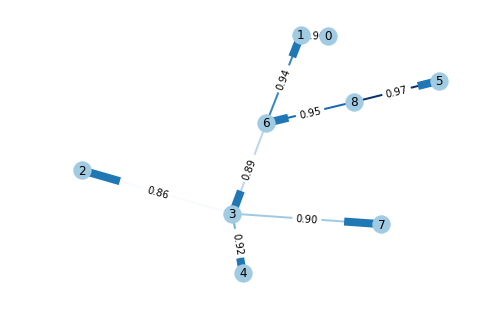

####################################################################
Score: 7.333398560540641
{(1, 0): '0.90', (3, 7): '0.90', (3, 2): '0.86', (3, 4): '0.92', (6, 1): '0.94', (6, 3): '0.89', (8, 5): '0.97', (8, 6): '0.95'}


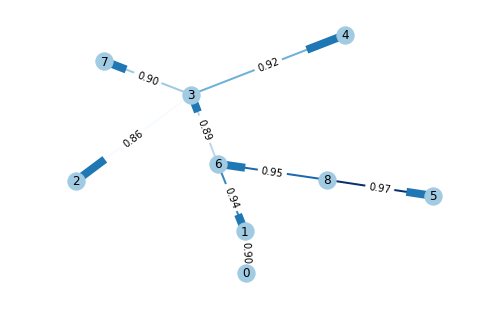

In [7]:
labels = ["nsubj", "dobj", "iobj", "det", "nmod", "amod", "cc", "conj"]
sentence = "Eins Zwei Drei Vier Funf Sechs Sieben Acht Neun".split()

matrix = np.random.random((len(sentence),len(sentence)))
graph,edges = matrix_to_graph(matrix, sentence, labels, digraph=True)


max_score = -np.inf
max_root = 0
for root in np.arange(0,len(sentence)):
    tree = max_tree(graph,root=root)
    maxim = get_score(tree)
    if maxim > max_score:
        max_score = maxim
        max_root = root

tree = max_tree(graph,root = max_root)
print("Score:", get_score(tree))
draw_nice(tree, custom_labels = False)

print("####################################################################")

tree11 = minimum_tree(graph)
print("Score:", get_score(tree11))
draw_nice(tree11)

In [9]:
matrix = np.aray([[0,0,15,0,0],[0,0,5,5,15],[0,20,0,5,30],[0,10,20,0,5],[0,5,10,15,0]])
sentence = "root John likes plain Bagels".split()
G_hw,edges = matrix_to_graph(matrix, sentence, labels, digraph=True)
tree_hw = max_tree(G_hw,root=0)
draw_nice(tree_hw, custom_labels = False)

AttributeError: module 'numpy' has no attribute 'aray'